# Semantic image segmentation

So far, you've seen image classification, where the network's task is to assign a label or class to an input image. However, suppose you want to know where an object is located in the image, its shape, which pixel belongs to which object, etc. In this case, you'll want to segment the image—that is, assign a label to each pixel in the image. Thus, the task of image segmentation is to train a neural network to produce a pixel-wise mask of the image. This helps understand the image at a much lower level—the pixel level. Image segmentation has many applications in medical imaging, self-driving cars, and satellite imagery, to name a few.

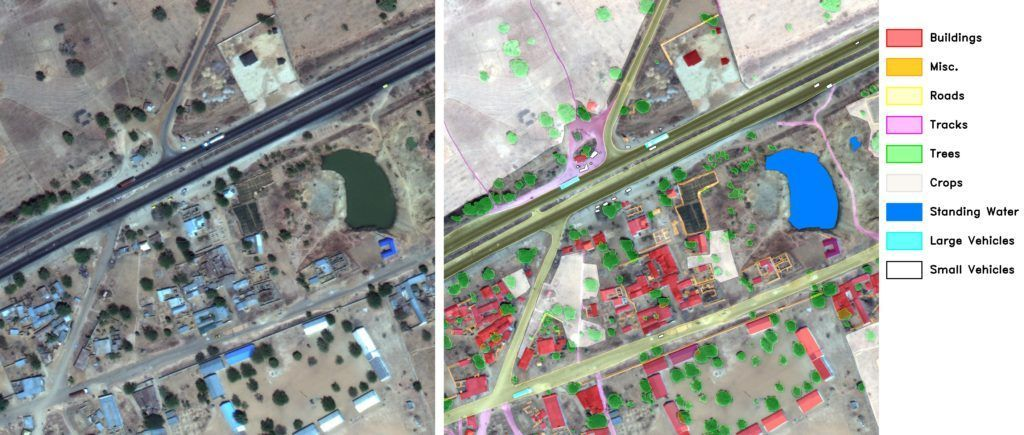

More precisely, semantic image segmentation is the task of labeling each pixel in an image into a predefined set of classes. For example, various objects such as cars, trees, people, traffic signs, etc. can be used as classes for semantic image segmentation. Therefore, the task is to take an image (RGB or grayscale) and produce a W x H x 1 matrix, where W and H represent the width and height of the image, respectively. Each cell in this matrix would contain the predicted class IDs for each pixel in the image.

In deep learning, we express categorical class labels as one-hot encoded vectors. Similarly, in semantic segmentation, we can express the output matrix using a one-hot encoding scheme by essentially creating a channel for each class label and marking the cells containing the corresponding class pixel with 1, and marking the remaining cells with 0.


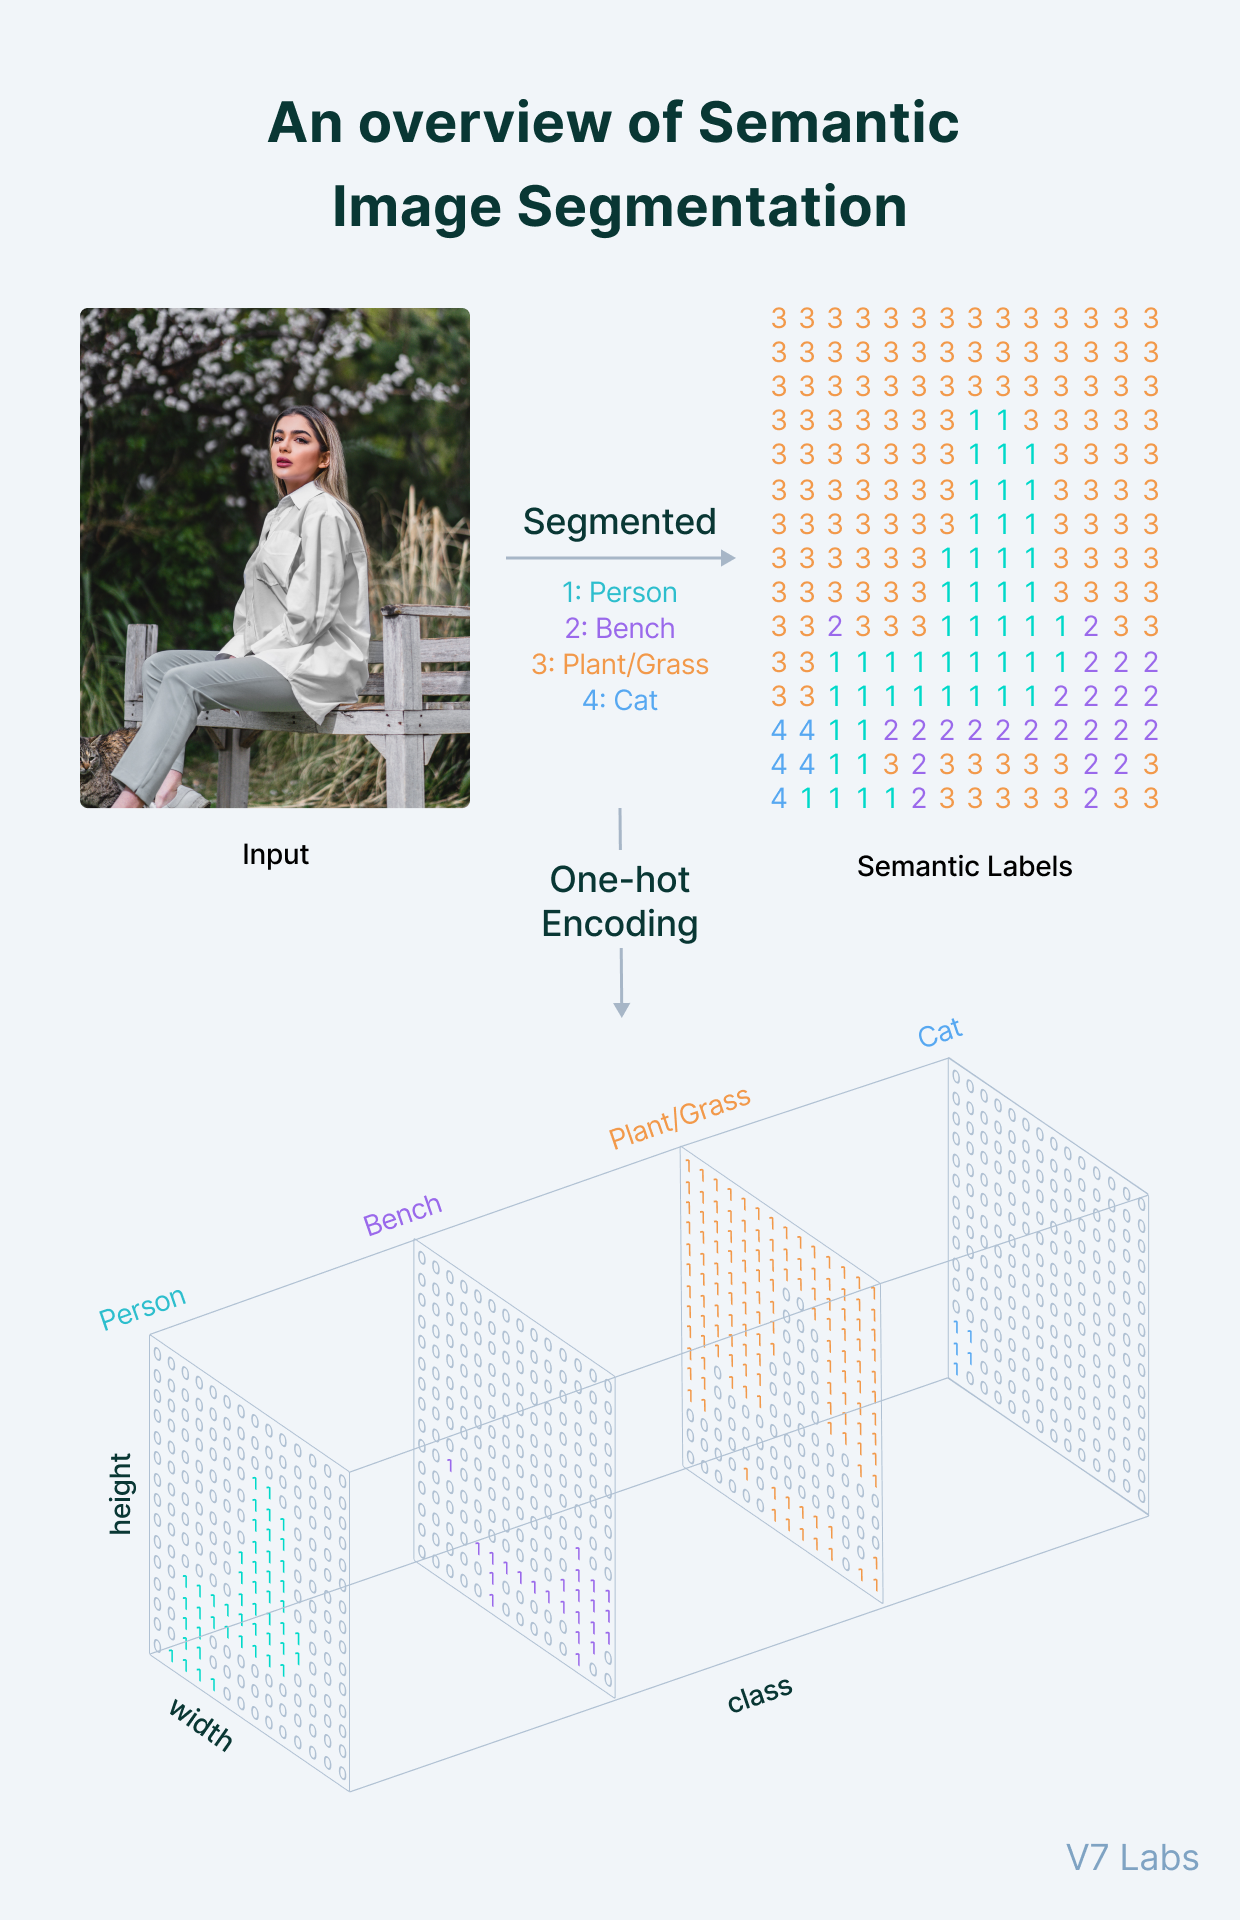

Like other computer vision tasks, using a CNN for semantic segmentation would be the obvious choice. When using CNN for semantic segmentation, the output would be an image with the same resolution as the input, unlike a fixed-length vector in the case of image classification.
The general architecture of the models contains a series of convolutional layers along with pooled or strided convolutional layers for downsampling. To improve the model, nonlinear activations and batch normalization layers are also used.
The initial layers in a convolutional neural network learn low-level features such as lines, edges, colors, etc., and the deeper layers learn high-level features such as faces or objects, etc.

Now that we have this low-resolution tensor, we must somehow upsample it to the original image to accomplish the semantic segmentation task. We feed this low-resolution feature map to upsampling layers, followed by more convolutional layers to create higher-resolution feature maps. As we increase the resolution, we simultaneously decrease the number of channels in the feature maps. This type of architecture is known as an encoder-decoder architecture. The downsampling phase is called the encoder, and the upsampling phase is called the decoder.

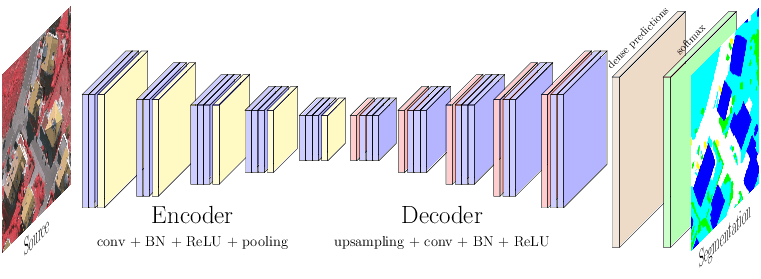

## U-Net

U-Net is an architecture developed by Olaf Ronneberger et al. for Biomedical Image Segmentation in 2015 at the University of Freiburg, Germany. It is one of the most popular approaches used in any semantic segmentation task today. It is a fully convolutional neural network designed to learn from fewer training samples. It is an improvement over the existing FCN (Fully Convolutional Networks for Semantic Segmentation) developed by Jonathan Long et al. in 2014.

U-Net is a U-shaped encoder-decoder network architecture consisting of four encoder blocks and four decoder blocks connected via a bridge. The encoder network (contraction path) has half the spatial dimensions and doubles the number of filters (feature channels) in each encoder block. Similarly, the decoder network has double the spatial dimensions and half the number of feature channels.

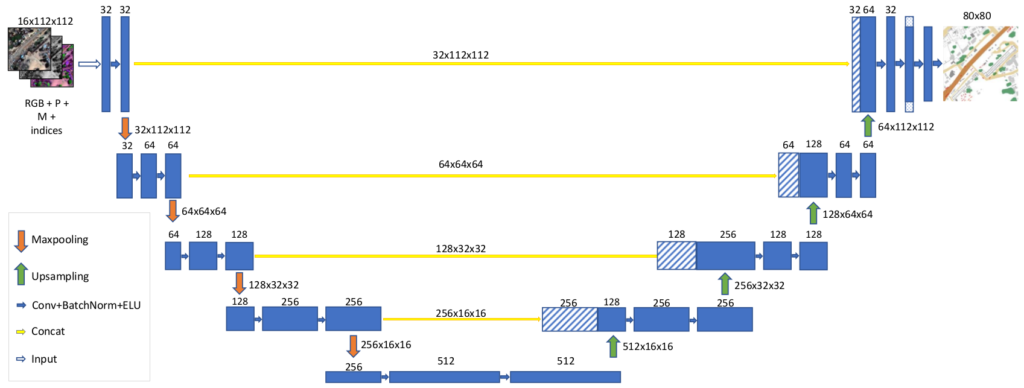

**Encoder**

The encoder acts as the feature extractor and learns an abstract representation of the input image through a sequence of encoder blocks. Each encoder block consists of two 3x3 convolutions, each followed by a ReLU (Rectified Linear Unit) activation function. The ReLU activation function introduces nonlinearity into the network, which helps improve generalization of the training data. The ReLU output acts as a skip connection to the corresponding decoder block.
This is followed by 2x2 max-pooling, where the spatial dimensions (height and width) of the feature maps are halved. This reduces computational cost by reducing the number of trainable parameters.

Skip connections provide additional information that helps the decoder generate better semantic features. They also act as a shortcut connection that helps the indirect flow of gradients to previous layers without any degradation. In simple terms, we can say that skip connections help improve gradient flow during backpropagation, which in turn helps the network learn a better representation.



**Decoder**

The decoder is used to take the abstract representation and generate a semantic segmentation mask. The decoder block begins with a 2x2 transposition convolution. It is then concatenated with the feature map of the corresponding skip connection from the encoder block. These skip connections provide features from previous layers that are sometimes lost due to the network's depth. After this, two 3x3 convolutions are used, each followed by a ReLU activation function.
The output of the final decoder undergoes a 1x1 convolution with sigmoid activation. The sigmoid activation function provides the segmentation mask that represents the pixel-by-pixel classification.

## Landslide Segmentation with U-Net and the Landslide4sense dataset

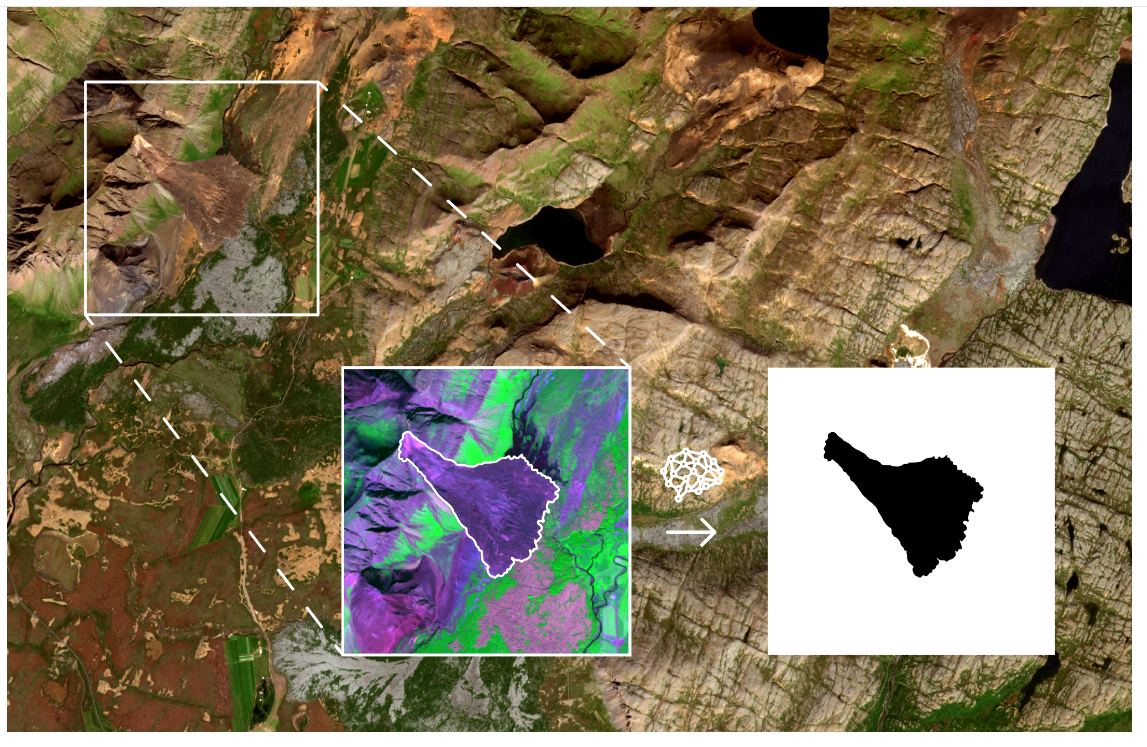

Landslides are a natural phenomenon with devastating consequences, frequent in many parts of the world. Thousands of small and medium-sized earth movements follow earthquakes or heavy rainfall. Landslides have become more damaging in recent years due to climate change, population growth, and unplanned urbanization in unstable mountainous areas. Early detection of landslides is critical for rapid response and consequence management. Accurate detection provides information about the exact location and extent of the landslide, which is necessary for landslide susceptibility modeling and risk assessment.

Recent advances in machine learning and computer vision, combined with the increasing availability of satellite imagery and computational resources, have facilitated rapid progress in landslide detection. Landslide4Sense aims to promote research in this area and challenges participants to detect landslides around the globe using multi-sensor satellite imagery. The images are collected from diverse geographic regions, offering an important resource for the remote sensing, computer vision, and machine learning communities.

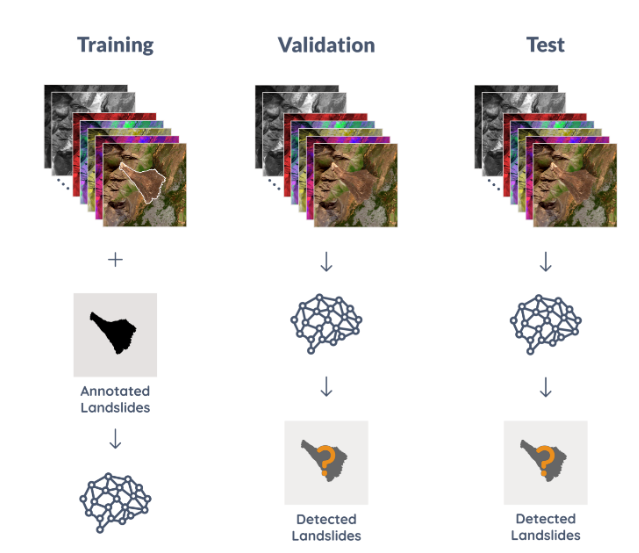

## The Dataset

The Landslide4Sense data set consists of training, validation, and testing sets containing 3,799, 245, and 800 image patches, respectively. Each image patch is a composite of 14 bands that include:
Sentinel-2 multispectral data: B1, B2, B3, B4, B5, B6, B7, B8, B9, B10, B11, B12.
ALOS PALSAR slope data: B13.
ALOS PALSAR digital elevation model (DEM): B14.

All bands in the competition dataset are resized to approximately 10m per pixel. Image patches are 128 x 128 pixels in size and are labeled per pixel.

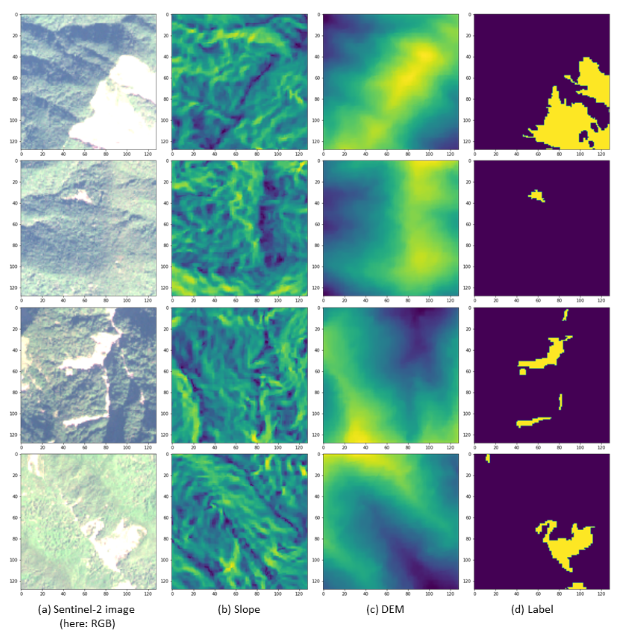

Link to dataset: https://drive.google.com/drive/folders/1dxsMxbbUz_Qn8vGLpFNdf_af6hjik2Ve?usp=drive_link

Let's start by connecting Drive and importing the libraries:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import glob
import os
import cv2
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

We set the paths where the images and masks are:

In [ ]:
path_train_images = '/content/drive/MyDrive/Datasets/Landslide dataset/TrainData/img'
path_train_masks = '/content/drive/MyDrive/Datasets/Landslide dataset/TrainData/mask'

In [ ]:
list_train_img = os.listdir(path_train_images)
list_train_msk = os.listdir(path_train_masks)

In [ ]:
list_train_img.sort()
list_train_msk.sort()

We import the images and masks:

In [ ]:
X = []
for f in list_train_img:
  with h5py.File(os.path.join(path_train_images,f), 'r') as hf:
    img_arr = hf.get('img')[:]
  print(img_arr.shape)
  X.append(img_arr)
X = np.array(X)

(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128, 14)
(128, 128,

In [ ]:
for i in range(X.shape[3]):
   X[:,:,:,i] = cv2.normalize(X[:,:,:,i], None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

In [ ]:
Y = []
for f in list_train_msk:
  with h5py.File(os.path.join(path_train_masks,f), 'r') as hf:
    img_arr = hf.get('mask')[:]
  print(img_arr.shape)
  Y.append(img_arr)
Y = np.array(Y)

(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)

After creating the X variable that contains the images and the Y variable that contains the masks, let's plot an example:

(-0.5, 127.5, 127.5, -0.5)

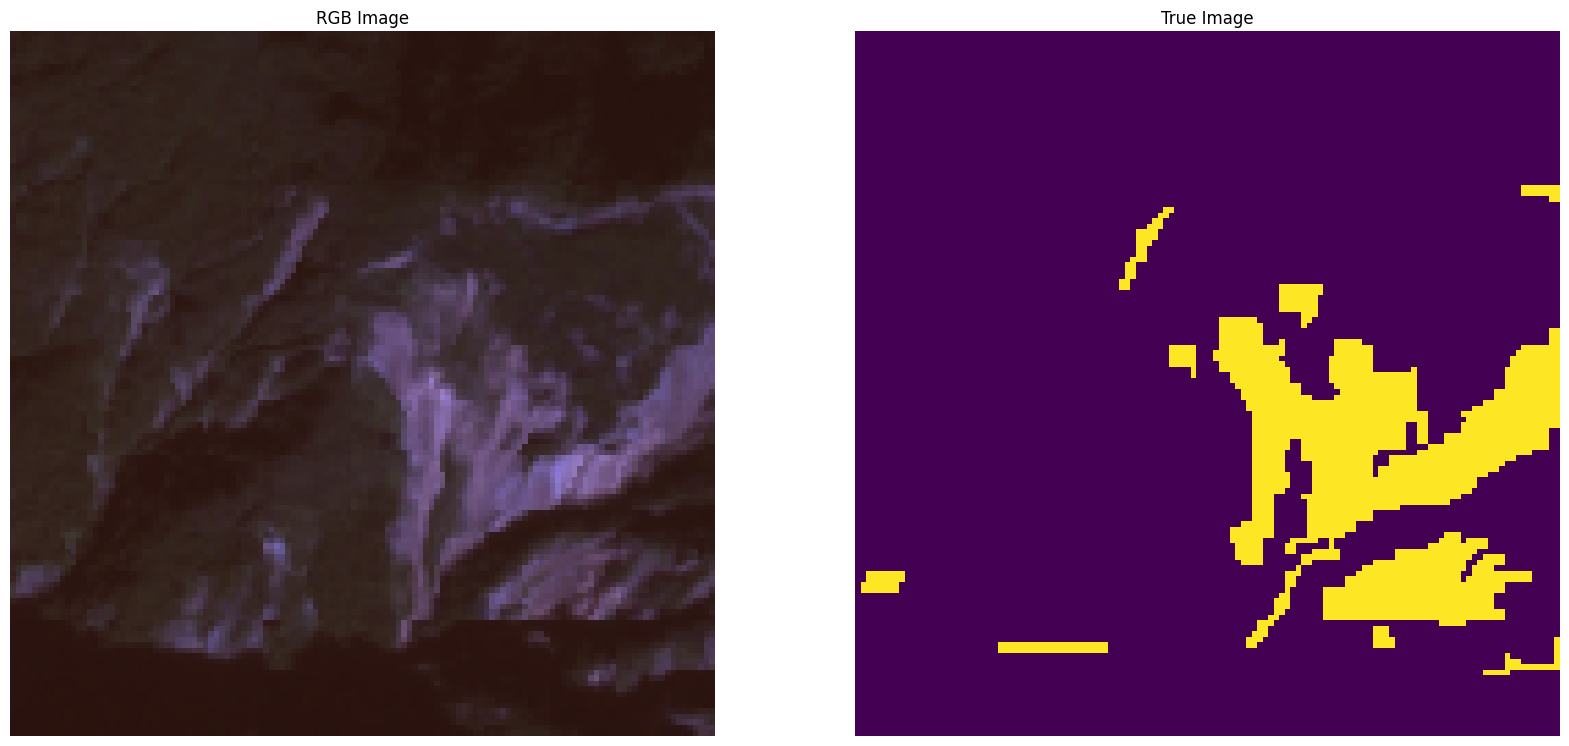

In [ ]:
i = 4
plt.figure(figsize=[20,20])
plt.subplot(121)
plt.imshow(X[i,:,:,1:4]/0.2)
plt.title('RGB Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(Y[i,:])
plt.title('True Image')
plt.axis('off')

The next step is to split the dataset into training and testing and import some Keras functions:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [ ]:
del X,Y

In [ ]:
y_train = y_train.astype('float')

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Concatenate, add, Conv2DTranspose, BatchNormalization, Dropout, Activation, Add, AveragePooling2D, Lambda, SeparableConv2D, GlobalAveragePooling2D, DepthwiseConv2D, ZeroPadding2D, LeakyReLU
#from tensorflow.keras.optimizers import Adam
from keras.optimizers import Adam
from keras.activations import relu
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.losses import binary_crossentropy
from keras import backend as K
from keras.models import load_model
from keras.models import model_from_json
from keras import ops
from keras import utils
from tensorflow.keras import backend as bk
from keras.losses import CategoricalFocalCrossentropy
from tensorflow.keras.losses import Dice

In [ ]:
y_test = y_test.astype('float')
y_test = y_test[:,:,:,np.newaxis]
y_train = y_train[:,:,:,np.newaxis]

In [ ]:
img_datagen = ImageDataGenerator(
    rotation_range=90,
    vertical_flip = True,
    horizontal_flip=True)

mask_datagen = ImageDataGenerator(
    rotation_range=90,
    vertical_flip = True,
    horizontal_flip=True)

In [ ]:
img_datagen.fit(x_train, augment=True,seed=1200)
mask_datagen.fit(y_train, augment=True,seed=1200)

/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1495: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (2659, 128, 128, 14) (14 channels).
  warnings.warn(


In [ ]:
train_generator=img_datagen.flow(x_train,y_train,batch_size=6,seed=1200)

/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:619: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (2659, 128, 128, 14) (14 channels).
  warnings.warn(


In [ ]:
steps_per_epoch = len(x_train)//6 - 1
validation_steps = len(x_test)//6 - 1

Let's implement Unet:

In [ ]:
upconv = True
droprate = 0.5
inputs = Input(shape=x_train.shape[1:])
conv1 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(inputs)
conv1 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)


pool1 = BatchNormalization()(pool1)
conv2 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(pool1)
conv2 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
pool2 = Dropout(droprate)(pool2)

pool2 = BatchNormalization()(pool2)
conv3 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(pool2)
conv3 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
pool3 = Dropout(droprate)(pool3)

pool3 = BatchNormalization()(pool3)
conv4 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(pool3)
conv4 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
pool4 = Dropout(droprate)(pool4)

pool4 = BatchNormalization()(pool4)
conv5 = Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(pool4)
conv5 = Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(conv5)
pool5 = MaxPooling2D(pool_size=(2, 2))(conv5)
pool5 = Dropout(droprate)(pool5)

pool5 = BatchNormalization()(pool5)
conv6 = Conv2D(1024, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(pool5)
conv6 = Conv2D(1024, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(conv6)
conv6 = Dropout(droprate)(conv6)

if upconv:
  up6 = concatenate([Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(conv6), conv5])
else:
  up6 = concatenate([UpSampling2D(size=(2, 2))(conv6), conv5])
up6 = BatchNormalization()(up6)
conv7 = Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(up6)
conv7 = Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(conv7)
conv7 = Dropout(droprate)(conv7)

if upconv:
  up7 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv7), conv4])
else:
  up7 = concatenate([UpSampling2D(size=(2, 2))(conv7), conv4])
up7 = BatchNormalization()(up7)
conv8 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(up7)
conv8 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(conv8)
conv8 = Dropout(droprate)(conv8)

if upconv:
  up8 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv8), conv3])
else:
  up8 = concatenate([UpSampling2D(size=(2, 2))(conv8), conv3])
up8 = BatchNormalization()(up8)
conv9 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(up8)
conv9 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(conv9)
conv9 = Dropout(droprate)(conv9)

if upconv:
  up9 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv9), conv2])
else:
  up9 = concatenate([UpSampling2D(size=(2, 2))(conv9), conv2])
up9 = BatchNormalization()(up9)
conv10 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(up9)
conv10 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(conv10)
conv10 = Dropout(droprate)(conv10)

if upconv:
  up10 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv10), conv1])
else:
  up10 = concatenate([UpSampling2D(size=(2, 2))(conv10), conv1])
up10 = BatchNormalization()(up10)
conv11 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(up10)
conv11 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(conv11)


conv12 = Conv2D(1, (1, 1), activation='sigmoid')(conv11)
model = Model(inputs=inputs, outputs=conv12)

model.compile(optimizer=Adam(learning_rate = 1e-5), loss = Dice, metrics=[ 'accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 14)   │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 128, 128, 32)   │          4,064 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 128, 128, 32)   │          9,248 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 64, 64, 32)     │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 64, 64, 32)     │            128 │ max_pooling2d[0][0]    │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 64, 64, 64)     │         18,496 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 64, 64, 64)     │         36,928 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 32, 32, 64)     │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 32, 32, 64)     │              0 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 32, 32, 64)     │            256 │ dropout[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 32, 32, 128)    │         73,856 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 32, 32, 128)    │        147,584 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 16, 16, 128)    │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 16, 16, 128)    │              0 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 16, 16, 128)    │            512 │ dropout_1[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 16, 16, 256)    │        295,168 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)    

 Total params: 31,109,569 (118.67 MB)

 Trainable params: 31,103,617 (118.65 MB)

 Non-trainable params: 5,952 (23.25 KB)

In [ ]:
history = model.fit(train_generator,steps_per_epoch=steps_per_epoch, validation_steps=validation_steps,
                              epochs=1, validation_data=(x_test,y_test))

442/442 ━━━━━━━━━━━━━━━━━━━━ 51s 113ms/step - accuracy: 0.8887 - loss: 0.8603 - val_accuracy: 0.9586 - val_loss: 0.5948


After completing the training, let's plot the accuracy and loss curves:

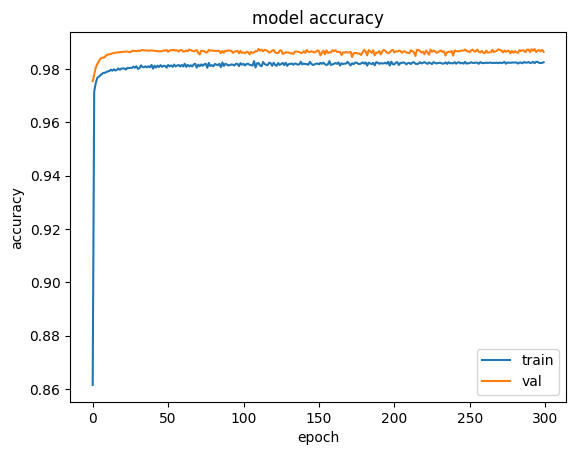

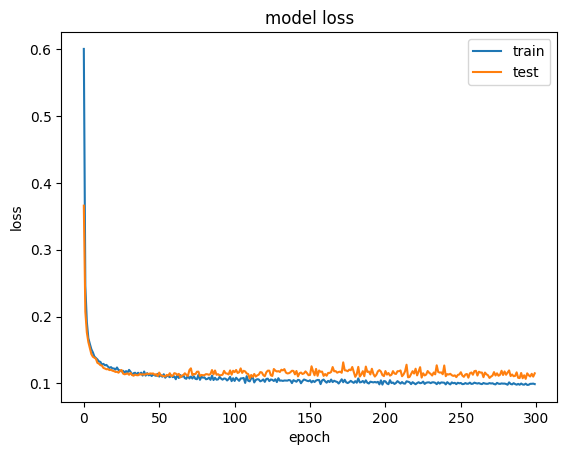

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

We can now apply the model to the test data and compare the result with the original mask:

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

In [ ]:
predict = model.predict(x_test)

36/36 [==============================] - 3s 41ms/step


(-0.5, 127.5, 127.5, -0.5)

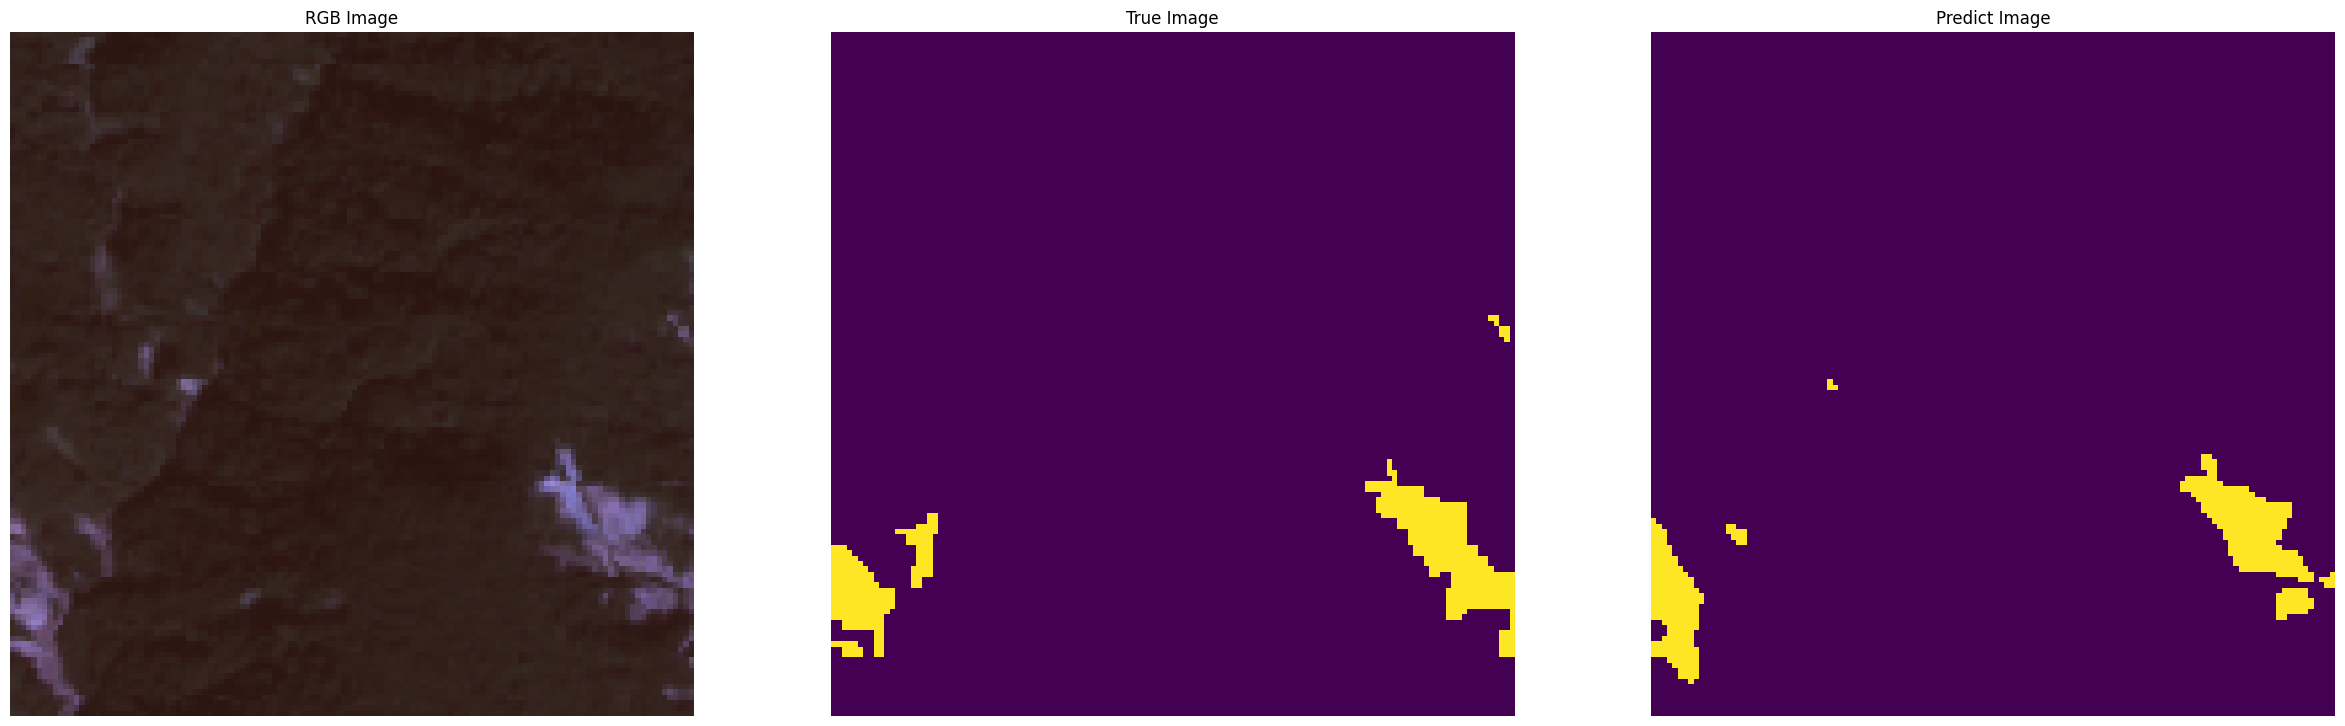

In [ ]:
i = 50
plt.figure(figsize=[30,30])
plt.subplot(131)
plt.imshow(x_test[i,:,:,1:4]/0.2)
plt.title('RGB Image')
plt.axis('off')
plt.subplot(132)
plt.imshow(np.round(y_test[i,:,:,0]))
plt.title('True Image')
plt.axis('off')
plt.subplot(133)
plt.imshow(np.round(predict[i,:,:,0]))
plt.title('Predict Image')
plt.axis('off')

We also calculated validation metrics:

In [ ]:
pred = np.round(predict)

In [ ]:
true = np.round(y_test)

In [ ]:
accuracy = accuracy_score(true.flatten(),pred.flatten())
print(accuracy)

0.9865279348273026


In [ ]:
cm = confusion_matrix(true.flatten(), pred.flatten())
print(cm)

[[18136566   101467]
 [  150161   289566]]


Text(0.5, 58.7222222222222, 'Predito')

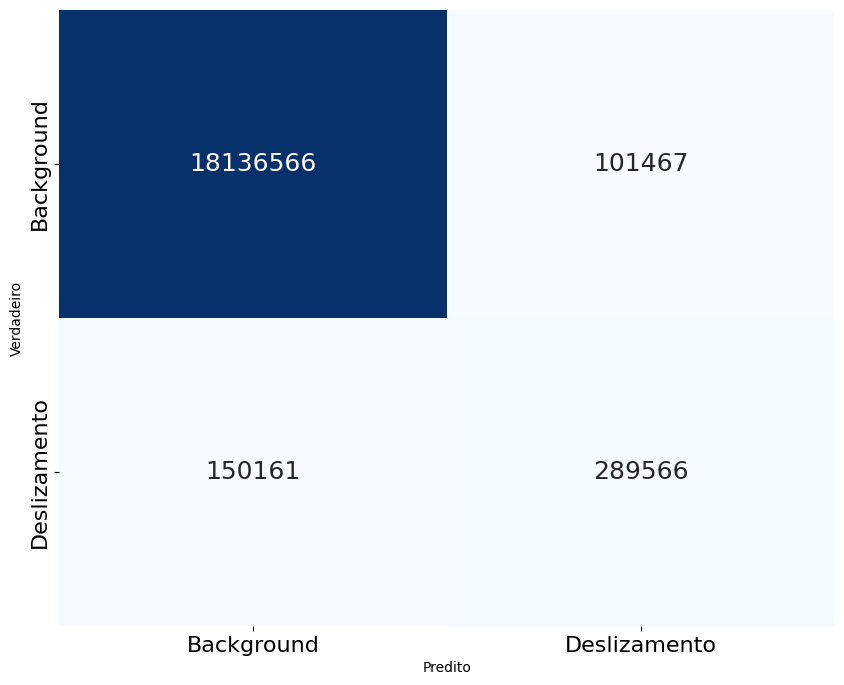

In [ ]:
columns = ['Background', 'Deslizamento']
r1 = pd.DataFrame(data=cm, columns=columns, index=columns)
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(r1, annot=True, annot_kws={"size": 18},fmt='d',cmap="Blues", cbar = False)
#for t in ax.texts: t.set_text(t.get_text() + " %")
ax.tick_params(labelsize=16)
ax.set_ylabel('Verdadeiro')
ax.set_xlabel('Predito')